# Perceptron

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('../csv/placement.csv')
df.head()

<Axes: xlabel='cgpa', ylabel='resume_score'>

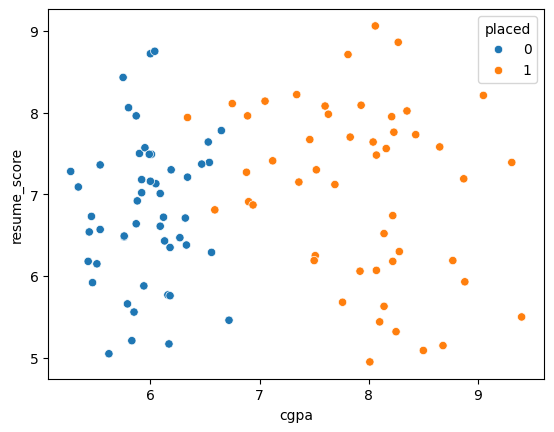

In [3]:
sns.scatterplot(x=df['cgpa'],y=df['resume_score'],hue=df['placed'])

In [4]:
x=df.iloc[:,0:2]
y=df.iloc[:,-1]

In [5]:
from sklearn.linear_model import Perceptron
p=Perceptron()

In [6]:
p.fit(x,y)

Perceptron()

In [7]:
p.coef_,p.intercept_

(array([[ 40.26, -36.  ]]), array([-25.]))

In [8]:
from mlxtend.plotting import plot_decision_regions

c:\Users\moury\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


<Axes: >

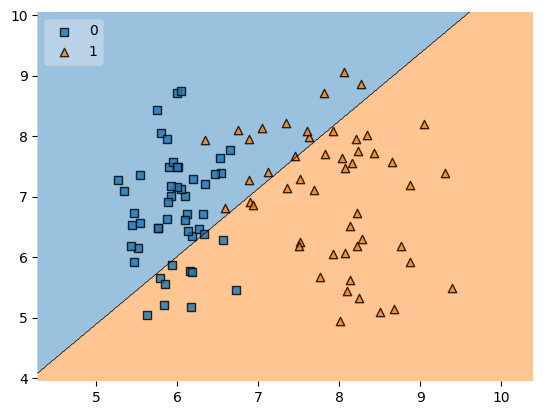

In [9]:
plot_decision_regions(x.values,y.values,clf=p,legend=2)

## Algorithm

In [10]:
from sklearn.datasets import make_classification

x,y=make_classification(n_samples=100,n_features=2,n_informative=1,n_redundant=0,
                        n_classes=2,n_clusters_per_class=1,random_state=41,hypercube=False,class_sep=10)

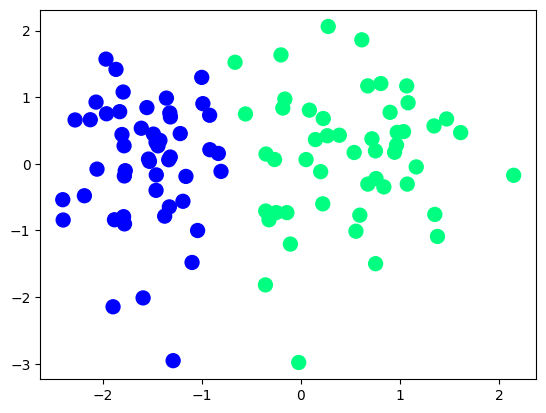

In [11]:
plt.scatter(x=x[:,0],y=x[:,1],c=y,cmap='winter',s=100)

In [12]:
def perceptron(x,y):

    x=np.insert(x,0,1,axis=1)
    weights=np.ones(x.shape[1])
    lr=0.1

    for i in range(1000):
        j=np.random.randint(0,100)
        y_hat=step(np.dot(x[j],weights))
        weights=weights+lr*(y[j]-y_hat)*x[j]
    return weights[0],weights[1:]
def step(z):
    return 1 if z>0 else 0

In [13]:
inter,coef=perceptron(x,y)
inter,coef

(np.float64(0.9), array([1.45230427, 0.07506576]))

In [20]:
def Per(x,y):
    w1=w2=b=1
    lr=0.1
    for j in range(1000):
        for i in range(x.shape[0]):

            z=w1*x[i][0]+w2*x[i][1]+b

            if z*y[i]<0:
                w1=w1+lr*y[i]*x[i][0]
                w2=w2+lr*y[i]*x[i][0]
                b=b+lr*y[i]
    return w1,w2,b

In [21]:
w1,w2,b=Per(x,y)

In [22]:
w1,w2,b

(np.float64(0.8246822253369194),
 np.float64(0.8246822253369194),
 np.float64(2.5000000000000013))

In [23]:
m=-(w1/w2)
c=-(b/w2)
m,c

(np.float64(-1.0), np.float64(-3.0314706964596456))

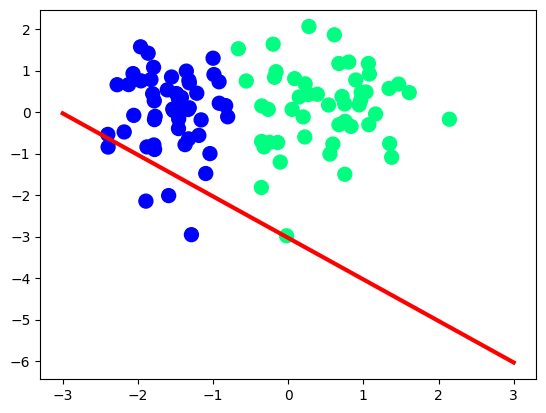

In [24]:
x_in=np.linspace(-3,3,100)
y_in=m*x_in+c
plt.plot(x_in,y_in,color='red',linewidth=3)
plt.scatter(x[:,0],x[:,1],c=y,cmap='winter',s=100)